<a href="https://www.kaggle.com/mickaelnarboni/seattle-co2-exploration-2016?scriptVersionId=85437670" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Context

The purpose of this notebook is preparing our data to predictive models comparison by doing a short exploration. 

We understand that the goal of the project is about predicting the EnergySTARScore. To do so, we'll have to draw some ideas for our predictive models.

About the cleaning, we can drop the lines that have NaN on their EnergySTARScore because it might biased our predictive model if we impute those data as this is the main variable we want to describe in this project. 

# Glossary

**PropertyGFATotal:** Gross floor area (GFA) - The total floor area contained within the property measured to the external face of the external walls.

**PropertyGFAParking:** Same as PropertyGFATotal but calculated for the parking lot. 

**PropertyGFABuilding(s):** Same as PropertyGFATotal but calculated for each building within the property.

**ENERGYSTARScore:** The ENERGY STAR score provides a comprehensive snapshot of your building’s energy performance, taking into account the building’s physical assets, operations, and occupant behavior. It is expressed on an easy-to-understand 1 to 100 scale, where the higher the score, the better the energy performance of the building. It’ll help you identify which buildings in your portfolio to target for improvement or recognition.

**SiteEUI(kBtu/sf):** EUI stands for Energy Use Intensity. It is simply the energy used by the building at it’s building site and not the power plant. EUI is expressed as energy per square foot per year. It’s calculated by dividing the total energy consumed by the building in one year (measured in kBtu or GJ) by the total gross floor area of the building (measured in square feet or square meters).

**SourceEUI(kBtu/sf):** Source energy refers to a building’s energy footprint since in addition to the site energy, it also accounts for the energy lost during production, transmission, and delivery to the site. Source energy includes the site energy plus all of the energy used to provide and distribute the site energy. As stated before, it includes the entire chain of energy so it is often called Total Energy.

**SiteEnergyUse(kBtu):** Site energy is the energy which is consumed at the final destination of the power generation cycle, and to simplify, is the amount of energy shown on a utility bill. It is the power that is used by the customer, whether residential, commercial, or industrial.

**Electricity(kWh):** Energy consumption in electricity (kWh) for the property

**Electricity(kBtu):** Energy consumption in electricity (kBtu) for the property

**NaturalGas(therms):** Energy consumption in natural gas (therms) for the property

**NaturalGas(kBtu):** Energy consumption in natural gas (kBtu) for the property

**TotalGHGEmissions:** Stands for Total Greenhouse Gas Emissions. It represents the sum of emissions of various gases: carbon dioxide, methane, nitrous oxide, and smaller trace gases such as hydrofluorocarbons (HFCs) and sulfur hexafluoride (SF6).

**GHGEmissionsIntensity:** Greenhouse Gas Emissions intensity (g CO2e/kWh) is calculated as the ratio of CO2e emissions from public electricity production (as a share of CO2 equivalent emissions from public electricity and heat production related to electricity production), and gross electricity production.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # ignore the warnings about file size
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sea-building-energy-benchmarking/clean_p3.csv
/kaggle/input/sea-building-energy-benchmarking/archive/2016-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/archive/socrata_metadata_2016-building-energy-benchmarking.json
/kaggle/input/sea-building-energy-benchmarking/archive/2015-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/archive/socrata_metadata_2015-building-energy-benchmarking.json


In [2]:
import pandas as pd
df = pd.read_csv('../input/sea-building-energy-benchmarking/archive/2016-building-energy-benchmarking.csv')

In [3]:
df.shape

(3376, 46)

In [4]:
# set option to be able to get each column and row of our dataframes
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [5]:
df.head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2.003882e+06,1.156514e+06,3946027.0,12764.529300,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.000000e+00,9.504252e+05,3242851.0,51450.816410,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,2.156655e+07,1.451544e+07,49526664.0,14938.000000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2.214446e+06,8.115253e+05,2768924.0,18112.130860,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.000000e+00,1.573449e+06,5368607.0,88039.984380,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,7,DOWNTOWN,47.61623,-122.33657,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,NaN,136.100006,141.600006,316.299988,320.500000,12086616.0,12581712.0,0.000000e+00,2.160444e+06,7371434.0,47151.816410,4715182.0,False,NaN,Compliant,NaN,301.81,3.10
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,7,DOWNTOWN,47.61390,-122.33283,1926,1.0,11,83008,0,83008,Hotel,Hotel,81352.0,NaN,NaN,NaN,NaN,NaN,27.0,70.800003,74.500000,146.600006,154.699997,5758795.0,6062767.5,0.000000e+00,8.239199e+05,2811215.0,29475.800780,2947580.0,False,NaN,Compliant,NaN,176.14,2.12
7,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,7,DOWNTOWN,47.61327,-122.33136,1926,1.0,8,102761,0,102761,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,102761.0,NaN,NaN,NaN,NaN,NaN,NaN,61.299999,68.800003,141.699997,152.300003,6298131.5,7067881.5,2.276286e+06,1.065843e+06,3636655.0,3851.890137,385189.0,False,NaN,Compliant,NaN,221.51,2.16
8,12,2016,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA,98104.0,0939000080,7,DOWNTOWN,47.60294,-122.33263,1904,1.0,15,163984,0,163984,Hotel,Hotel,163984.0,Na

In [6]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [7]:
print('number of columns:',len(df.columns)) # return the number of columns 
print('number of rows:',len(df)) # return the number of rows
print('number of cells:',len(df)*len(df.columns))# return the number of data 
print('number of missing values:',df.isna().sum().sum()) # return the number of total missing values
print('number of missing values in % : {:.2%}'.format((df.isna().sum().sum())/(len(df)*len(df.columns)))) # return the percentage of missing values




number of columns: 46
number of rows: 3376
number of cells: 155296
number of missing values: 19952
number of missing values in % : 12.85%


In [8]:
for i in df.columns:
    print(i,'||',df[i].dtypes,'||', df[i].isna().sum(),'||','{:.2%}'.format((df.isna().sum()/len(df))[i])) 

OSEBuildingID || int64 || 0 || 0.00%
DataYear || int64 || 0 || 0.00%
BuildingType || object || 0 || 0.00%
PrimaryPropertyType || object || 0 || 0.00%
PropertyName || object || 0 || 0.00%
Address || object || 0 || 0.00%
City || object || 0 || 0.00%
State || object || 0 || 0.00%
ZipCode || float64 || 16 || 0.47%
TaxParcelIdentificationNumber || object || 0 || 0.00%
CouncilDistrictCode || int64 || 0 || 0.00%
Neighborhood || object || 0 || 0.00%
Latitude || float64 || 0 || 0.00%
Longitude || float64 || 0 || 0.00%
YearBuilt || int64 || 0 || 0.00%
NumberofBuildings || float64 || 8 || 0.24%
NumberofFloors || int64 || 0 || 0.00%
PropertyGFATotal || int64 || 0 || 0.00%
PropertyGFAParking || int64 || 0 || 0.00%
PropertyGFABuilding(s) || int64 || 0 || 0.00%
ListOfAllPropertyUseTypes || object || 9 || 0.27%
LargestPropertyUseType || object || 20 || 0.59%
LargestPropertyUseTypeGFA || float64 || 20 || 0.59%
SecondLargestPropertyUseType || object || 1697 || 50.27%
SecondLargestPropertyUseTypeGFA || f

In [9]:
# split our variables into categorical and continuous types

# categorical variables
df_categorical = pd.DataFrame(data=df.select_dtypes(include=['object']))
df_categorical.head(10)


,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,ComplianceStatus,Outlier
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,0659000030,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,Compliant,NaN
2,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,0659000475,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
3,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,0659000640,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,0659000970,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,Compliant,NaN
5,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,0660000560,DOWNTOWN,Police Station,Police Station,NaN,NaN,NaN,Compliant,NaN
6,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,0660000825,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
7,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,0660000955,DOWNTOWN,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,NaN,NaN,NaN,Compliant,NaN
8,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA,0939000080,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
9,Multifamily MR (5-9),Mid-Rise Multifamily,Lyon Building,607 - 3rd Ave.,Seattle,WA,0939000105,DOWNTOWN,Multifamily Housing,Multifamily Housing,NaN,NaN,NaN,Compliant,NaN


In [10]:
df_quantitative = pd.DataFrame(data=df.select_dtypes(include=['int64','float64']))
df_quantitative.head(10)

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,98101.0,7,47.61220,-122.33799,1927,1.0,12,88434,0,88434,88434.0,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2.003882e+06,1.156514e+06,3946027.0,12764.529300,1276453.0,NaN,249.98,2.83
1,2,2016,98101.0,7,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.000000e+00,9.504252e+05,3242851.0,51450.816410,5145082.0,NaN,295.86,2.86
2,3,2016,98101.0,7,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,756493.0,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,2.156655e+07,1.451544e+07,49526664.0,14938.000000,1493800.0,NaN,2089.28,2.19
3,5,2016,98101.0,7,47.61412,-122.33664,1926,1.0,10,61320,0,61320,61320.0,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2.214446e+06,8.115253e+05,2768924.0,18112.130860,1811213.0,NaN,286.43,4.67
4,8,2016,98121.0,7,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,123445.0,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.000000e+00,1.573449e+06,5368607.0,88039.984380,8803998.0,NaN,505.01,2.88
5,9,2016,98101.0,7,47.61623,-122.33657,1999,1.0,2,97288,37198,60090,88830.0,NaN,NaN,NaN,136.100006,141.600006,316.299988,320.500000,12086616.0,12581712.0,0.000000e+00,2.160444e+06,7371434.0,47151.816410,4715182.0,NaN,301.81,3.10
6,10,2016,98101.0,7,47.61390,-122.33283,1926,1.0,11,83008,0,83008,81352.0,NaN,NaN,27.0,70.800003,74.500000,146.600006,154.699997,5758795.0,6062767.5,0.000000e+00,8.239199e+05,2811215.0,29475.800780,2947580.0,NaN,176.14,2.12
7,11,2016,98101.0,7,47.61327,-122.33136,1926,1.0,8,102761,0,102761,102761.0,NaN,NaN,NaN,61.299999,68.800003,141.699997,152.300003,6298131.5,7067881.5,2.276286e+06,1.065843e+06,3636655.0,3851.890137,385189.0,NaN,221.51,2.16
8,12,2016,98104.0,7,47.60294,-122.33263,1904,1.0,15,163984,0,163984,163984.0,NaN,NaN,43.0,83.699997,86.599998,180.899994,187.199997,13723820.0,14194054.0,0.000000e+00,2.138898e+06,7297919.0,64259.000000,6425900.0,NaN,392.16,2.39
9,13,2016,98104.0,7,47.60284,-122.33184,1910,1.0,6,63712,1496,62216,56132.0,NaN,NaN,1.0,81.500000,85.599998,182.699997,187.399994,4573777.0,4807679.5,1.039735e+06,7.420912e+05,2532015.0,10020.259770,1002026.0,NaN,151.12,2.37


# Remove Rows with Missing Values

We decide to remobe the rows with missing values on ENERGYSTARScore, because this feature is the one that is central in our project and we don't want to eventually bias our predictions by including missing data for that variable.

In [11]:
df.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [12]:
missing_data = pd.DataFrame()
missing_data['Column variable'] = df.columns
missing_data['Data type'] = list(df.dtypes)
missing_data['Missing values count'] = list(df.isna().sum())
missing_data['% Missing values'] = list((df.isna().sum()/len(df))) 
print(missing_data)

                    Column variable Data type  Missing values count  \
0                     OSEBuildingID     int64                     0   
1                          DataYear     int64                     0   
2                      BuildingType    object                     0   
3               PrimaryPropertyType    object                     0   
4                      PropertyName    object                     0   
5                           Address    object                     0   
6                              City    object                     0   
7                             State    object                     0   
8                           ZipCode   float64                    16   
9     TaxParcelIdentificationNumber    object                     0   
10              CouncilDistrictCode     int64                     0   
11                     Neighborhood    object                     0   
12                         Latitude   float64                     0   
13    

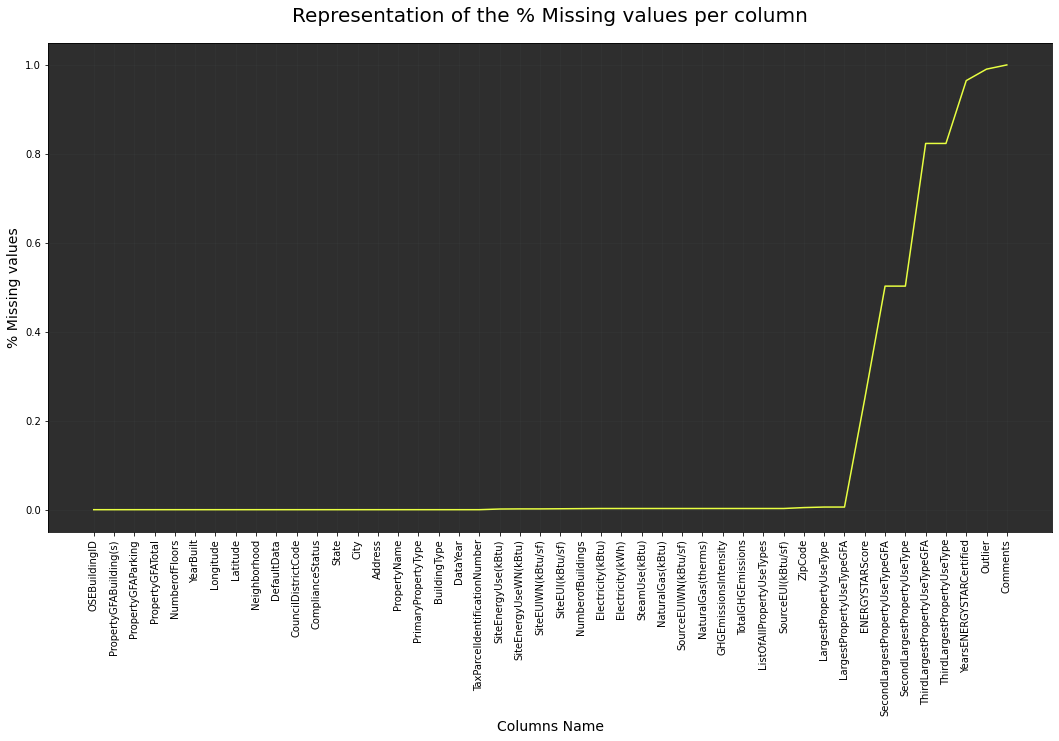

In [13]:
# data visualization for missing values of our dataframe called missing_data

to_plot = missing_data.sort_values(by=['% Missing values'])
fig, ax = plt.subplots(figsize=(18, 9))
ax.set_facecolor("#2E2E2E")
plt.title('Representation of the % Missing values per column', fontsize=20, y=1.03)
plt.xlabel('Columns Name', fontsize=14)
plt.ylabel('% Missing values', fontsize=14)
plt.grid(True, color="#93a1a1", alpha=0.05)
plt.xticks(rotation=90) # this line allow us to rotate the x_labels so they can be readable
plt.plot(to_plot['Column variable'],to_plot['% Missing values'],color="#E8FF41"); 


In [14]:
# Based on the above data visualization, we drop the columns and axis with too many NaN values
data = df.drop(['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','YearsENERGYSTARCertified','Comments','Outlier'], axis=1)
data = data.dropna(axis = 0, how ='any',subset=['ENERGYSTARScore','ZipCode','LargestPropertyUseType','LargestPropertyUseTypeGFA','SiteEUIWN(kBtu/sf)'])
data.shape

(2522, 39)

In [15]:
data.isna().sum().sum()

0

In [16]:
pd.crosstab(data['Neighborhood'], data['PrimaryPropertyType'])

PrimaryPropertyType,Distribution Center,High-Rise Multifamily,Hospital,Hotel,K-12 School,Large Office,Low-Rise Multifamily,Medical Office,Mid-Rise Multifamily,Mixed Use Property,Other,Refrigerated Warehouse,Residence Hall,Retail Store,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,Warehouse,Worship Facility
Neighborhood,,,,,,,,,,,,,,,,,,,
BALLARD,0,0,1,1,6,0,28,0,26,0,0,0,0,4,1,6,4,8,6
Ballard,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
CENTRAL,0,2,1,0,10,0,31,3,13,0,0,0,0,2,3,10,1,1,2
Central,0,0,0,0,0,0,13,0,3,1,0,0,0,0,2,0,0,0,0
DELRIDGE,3,0,0,0,8,1,26,1,8,0,0,0,0,6,1,4,0,4,2
DOWNTOWN,0,50,0,40,2,98,30,2,75,8,6,0,2,17,2,66,0,5,2
Delridge,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
EAST,0,27,3,4,13,0,153,14,114,4,0,0,2,3,5,14,3,4,5
GREATER DUWAMISH,34,1,0,2,11,8,20,0,2,5,0,5,0,11,1,37,4,96,2


In [17]:
pd.crosstab(data['BuildingType'], data['Neighborhood'])

Neighborhood,BALLARD,Ballard,CENTRAL,Central,DELRIDGE,DOWNTOWN,Delridge,EAST,GREATER DUWAMISH,LAKE UNION,MAGNOLIA / QUEEN ANNE,NORTH,NORTHEAST,NORTHWEST,North,Northwest,SOUTHEAST,SOUTHWEST
BuildingType,,,,,,,,,,,,,,,,,,
Campus,0,0,2,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
Multifamily HR (10+),0,0,2,0,0,51,0,28,1,2,4,0,3,4,0,0,0,0
Multifamily LR (1-4),28,1,33,14,27,31,0,154,21,52,151,58,83,89,28,4,31,62
Multifamily MR (5-9),26,0,13,3,8,76,0,116,2,39,76,14,40,16,2,0,10,31
NonResidential,32,3,25,2,23,245,3,65,200,100,86,32,81,49,3,4,20,19
Nonresidential COS,0,0,0,0,0,2,0,0,4,1,0,0,0,0,0,0,1,0
SPS-District K-12,5,1,4,0,6,0,0,4,10,4,5,5,8,8,1,1,13,8


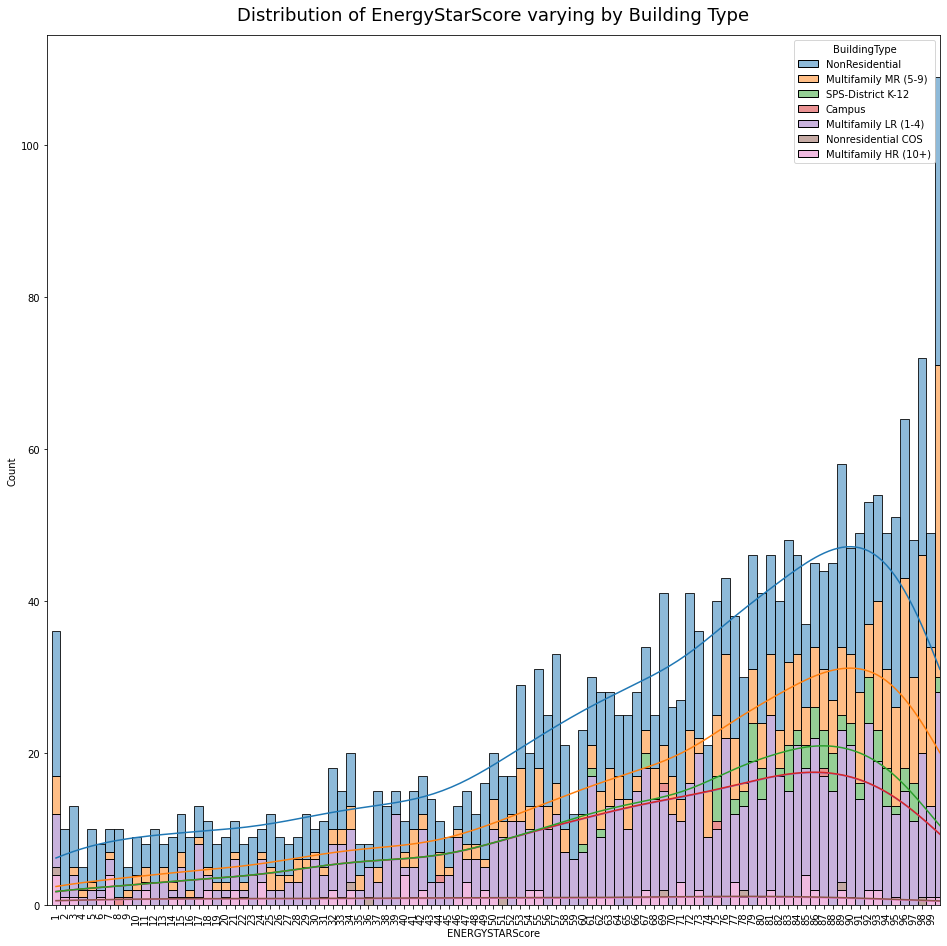

In [18]:
fig, ax = plt.subplots(figsize=(16, 16))
plt.title("Distribution of EnergyStarScore varying by Building Type", size=18, y=1.01)
sns.histplot(data=data, x=data['ENERGYSTARScore'], hue=data['BuildingType'], multiple="stack", element="bars", discrete=True, stat="count", kde=True)
ax.set_xlim(0,100)
ax.set_xticks(range(1,100))
plt.xticks(rotation=90)
plt.show()

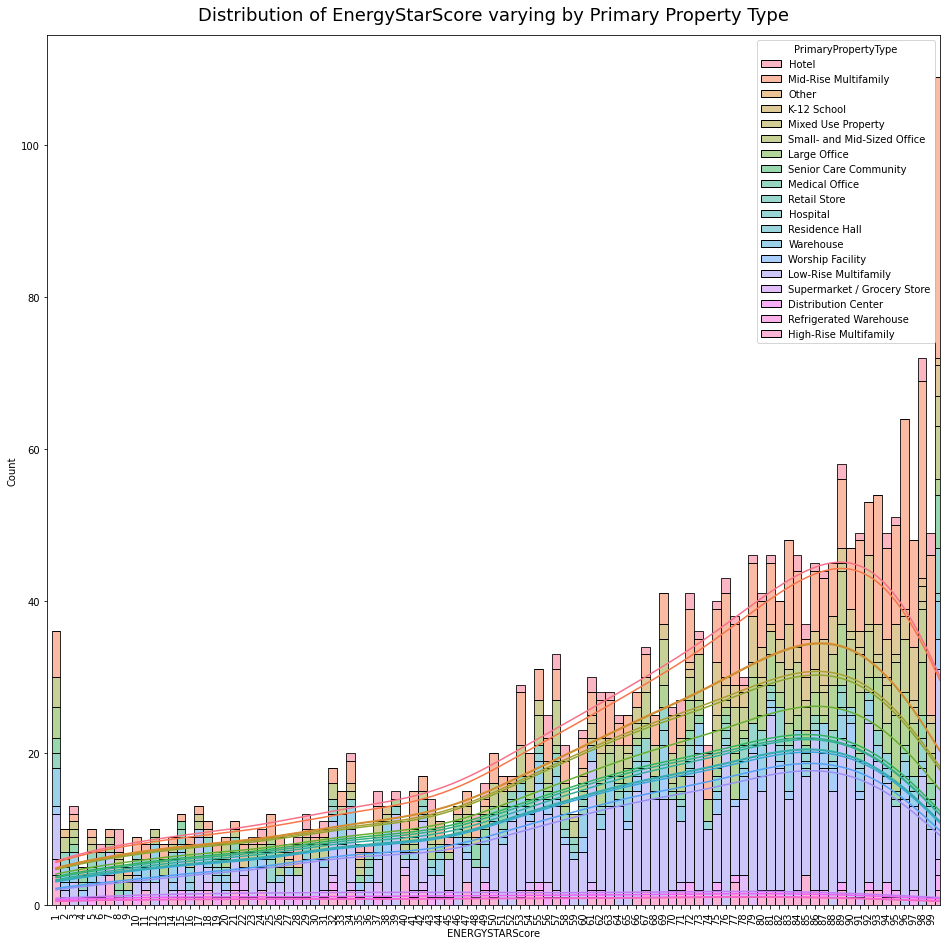

In [19]:
fig, ax = plt.subplots(figsize=(16, 16))
plt.title("Distribution of EnergyStarScore varying by Primary Property Type", size=18, y=1.01)
sns.histplot(data=data, x=data['ENERGYSTARScore'], hue=data['PrimaryPropertyType'], multiple="stack", element="bars", discrete=True, stat="count", kde=True)
ax.set_xlim(0,100)
ax.set_xticks(range(1,100))
plt.xticks(rotation=90)
plt.show()

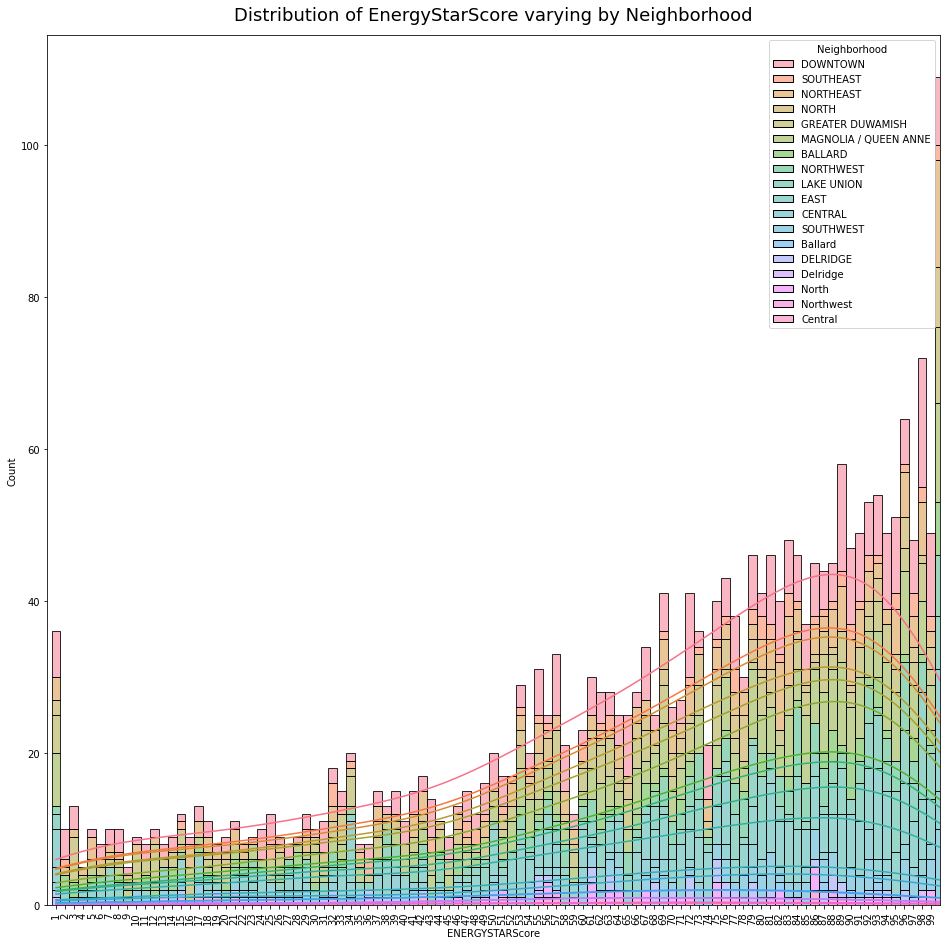

In [20]:
fig, ax = plt.subplots(figsize=(16, 16))
plt.title("Distribution of EnergyStarScore varying by Neighborhood", size=18, y=1.01)
sns.histplot(data=data, x=data['ENERGYSTARScore'], hue=data['Neighborhood'], multiple="stack", element="bars", discrete=True, stat="count", kde=True)
ax.set_xlim(0,100)
ax.set_xticks(range(1,100))
plt.xticks(rotation=90)
plt.show()

In [21]:
data.groupby('BuildingType')['ENERGYSTARScore'].describe()

,count,mean,std,min,25%,50%,75%,max
BuildingType,,,,,,,,
Campus,5.0,56.600000,31.373556,8.0,44.00,69.0,75.00,87.0
Multifamily HR (10+),95.0,51.200000,29.867651,1.0,24.00,53.0,77.50,100.0
Multifamily LR (1-4),867.0,68.534025,23.821743,1.0,55.00,73.0,87.00,100.0
Multifamily MR (5-9),472.0,76.154661,24.973349,1.0,63.75,84.0,96.00,100.0
NonResidential,992.0,63.822581,28.925472,1.0,44.00,71.0,89.00,100.0
Nonresidential COS,8.0,57.000000,32.583957,1.0,35.50,60.0,80.75,98.0
SPS-District K-12,83.0,85.614458,8.781676,60.0,80.00,87.0,92.00,100.0


In [22]:
data.groupby('PrimaryPropertyType')['ENERGYSTARScore'].describe()

,count,mean,std,min,25%,50%,75%,max
PrimaryPropertyType,,,,,,,,
Distribution Center,40.0,53.725000,31.670570,1.0,25.75,55.5,80.50,100.0
High-Rise Multifamily,91.0,51.868132,29.876118,1.0,24.00,54.0,79.00,100.0
Hospital,10.0,48.100000,31.032062,10.0,24.50,44.0,70.00,100.0
Hotel,73.0,60.506849,26.324958,3.0,39.00,62.0,81.00,99.0
K-12 School,125.0,79.872000,18.839293,5.0,75.00,85.0,92.00,100.0
Large Office,162.0,76.969136,23.831297,1.0,70.25,85.5,93.75,100.0
Low-Rise Multifamily,845.0,68.292308,23.738973,1.0,55.00,73.0,87.00,100.0
Medical Office,37.0,43.513514,27.057163,1.0,21.00,51.0,64.00,89.0
Mid-Rise Multifamily,461.0,76.071584,25.092899,1.0,64.00,84.0,96.00,100.0


In [23]:
data.groupby('Neighborhood')['ENERGYSTARScore'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
BALLARD,91.0,64.307692,31.940811,2.0,39.00,72.0,90.5,100.0
Ballard,5.0,71.800000,36.451337,7.0,82.00,87.0,90.0,93.0
CENTRAL,79.0,64.582278,27.172105,1.0,44.50,68.0,90.5,100.0
Central,19.0,61.526316,25.445734,17.0,46.50,64.0,80.0,100.0
DELRIDGE,64.0,63.015625,25.131712,1.0,43.50,69.5,81.5,97.0
DOWNTOWN,405.0,66.683951,27.794576,1.0,50.00,74.0,90.0,100.0
Delridge,3.0,42.333333,50.063293,1.0,14.50,28.0,63.0,98.0
EAST,368.0,68.038043,26.050123,1.0,53.00,74.0,90.0,100.0
GREATER DUWAMISH,239.0,59.163180,29.513609,1.0,37.00,63.0,84.0,100.0


(array([-122.425, -122.4  , -122.375, -122.35 , -122.325, -122.3  ,
        -122.275, -122.25 , -122.225, -122.2  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

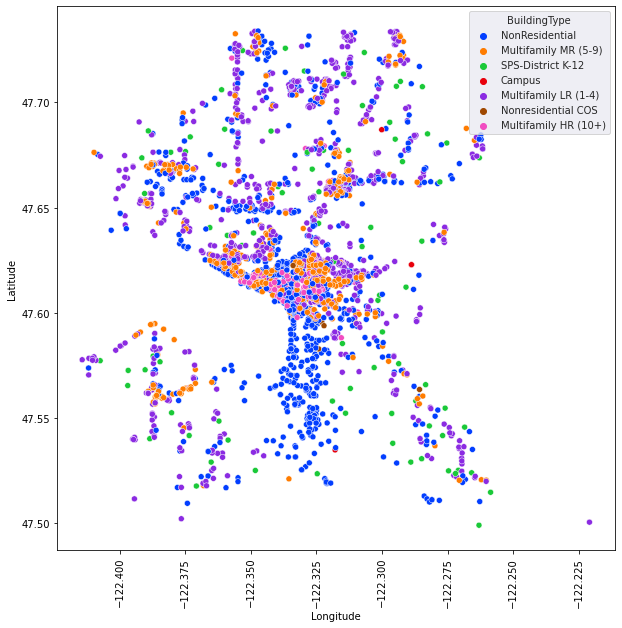

In [24]:
# we do a scatterplot with x is the longitude and y the latitude, we will use a categorical variable as hue to see if there is any patterns
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('darkgrid')
sns.scatterplot(x=data['Longitude'], y=data['Latitude'],hue=data['BuildingType'], palette="bright")
plt.xticks(rotation=90)

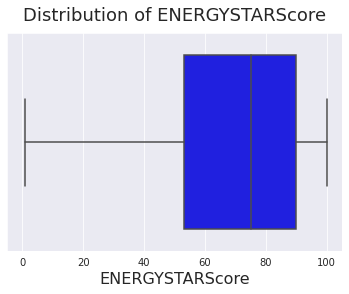

In [25]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data['ENERGYSTARScore'],color="blue")
plt.xlabel("ENERGYSTARScore", size=16)
plt.title("Distribution of ENERGYSTARScore", size=18, y=1.03)
plt.xlim([-5, 105])
plt.show()

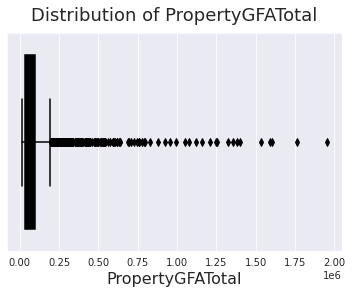

In [26]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data['PropertyGFATotal'],color="black")
plt.xlabel("PropertyGFATotal", size=16)
plt.title("Distribution of PropertyGFATotal", size=18, y=1.03)
plt.show()

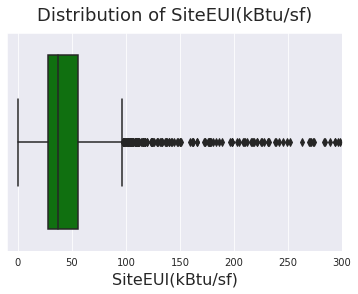

In [27]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data['SiteEUI(kBtu/sf)'],color="green")
plt.xlabel("SiteEUI(kBtu/sf)", size=16)
plt.title("Distribution of SiteEUI(kBtu/sf)", size=18, y=1.03)
plt.xlim([-10, 300])
plt.show()

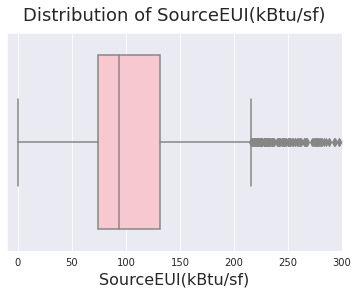

In [28]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data['SourceEUI(kBtu/sf)'],color="pink")
plt.xlabel("SourceEUI(kBtu/sf)", size=16)
plt.title("Distribution of SourceEUI(kBtu/sf)", size=18, y=1.03)
plt.xlim([-10, 300])
plt.show()

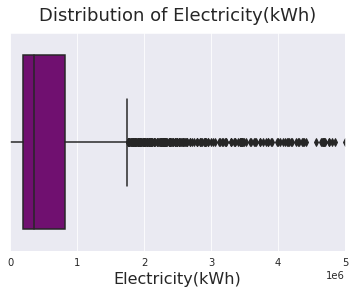

In [29]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data['Electricity(kWh)'],color="purple")
plt.xlabel("Electricity(kWh)", size=16)
plt.title("Distribution of Electricity(kWh)", size=18, y=1.03)
plt.xlim([-10, 0.5*1e7])
plt.show()

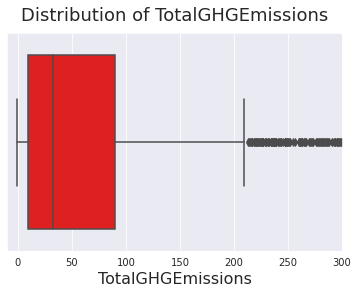

In [30]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data['TotalGHGEmissions'],color="red")
plt.xlabel("TotalGHGEmissions", size=16)
plt.title("Distribution of TotalGHGEmissions", size=18, y=1.03)
plt.xlim([-10, 300])
plt.show()

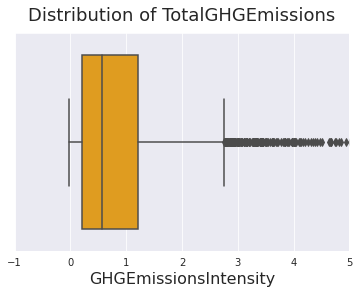

In [31]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data['GHGEmissionsIntensity'],color="orange")
plt.xlabel("GHGEmissionsIntensity", size=16)
plt.title("Distribution of TotalGHGEmissions", size=18, y=1.03)
plt.xlim([-1, 5])
plt.show()

In [32]:
# IQR detection and method
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print('Lower bound for each quantitative variable:')
print(lower_bound) 
print('Upper bound for each quantitative variable:')
print(upper_bound) 
# we eliminate all the values above it for each column using IQR, we can notice them with the max() function
data_out = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
data_out.describe()

Lower bound for each quantitative variable:
OSEBuildingID                1.104938e+04
DataYear                     2.016000e+03
ZipCode                      9.807950e+04
CouncilDistrictCode         -3.000000e+00
Latitude                     4.751824e+01
Longitude                   -1.223996e+02
YearBuilt                    1.887000e+03
NumberofBuildings            1.000000e+00
NumberofFloors              -1.500000e+00
PropertyGFATotal            -6.868162e+04
PropertyGFAParking           0.000000e+00
PropertyGFABuilding(s)      -6.082862e+04
LargestPropertyUseTypeGFA   -5.639500e+04
ENERGYSTARScore             -2.500000e+00
SiteEUI(kBtu/sf)            -1.360000e+01
SiteEUIWN(kBtu/sf)          -1.405000e+01
SourceEUI(kBtu/sf)          -1.047500e+01
SourceEUIWN(kBtu/sf)        -7.537500e+00
SiteEnergyUse(kBtu)         -3.821586e+06
SiteEnergyUseWN(kBtu)       -3.972390e+06
SteamUse(kBtu)               0.000000e+00
Electricity(kWh)            -7.437646e+05
Electricity(kBtu)           -2.5

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1865.000000,2522.0,2433.000000,2522.000000,2503.000000,2459.000000,2522.000000,2404.0,2338.000000,2248.000000,2130.0,2257.000000,2268.000000,2522.000000,2359.000000,2360.000000,2306.000000,2311.000000,2.242000e+03,2.246000e+03,2435.0,2.232000e+03,2.232000e+03,2283.000000,2.283000e+03,2266.000000,2318.000000
mean,23727.180697,2016.0,98114.690917,4.466297,47.626221,-122.335253,1969.905630,1.0,3.806672,57626.008897,0.0,54717.790873,51213.477072,67.955987,40.344129,42.527119,97.791457,102.028126,2.271186e+06,2.386499e+06,0.0,4.432783e+05,1.512466e+06,5155.311519,5.155312e+05,45.035799,0.697955
std,2677.352754,0.0,11.356542,2.094517,0.047416,0.025421,32.226314,0.0,1.935040,40156.442101,0.0,36391.909260,34100.853279,26.861524,18.401202,19.515352,39.387064,40.517770,1.950748e+06,2.032724e+06,0.0,3.821696e+05,1.303963e+06,6957.313138,6.957313e+05,47.913156,0.643739
min,19440.000000,2016.0,98101.000000,1.000000,47.518990,-122.399330,1900.000000,1.0,0.000000,16300.000000,0.0,3636.000000,8061.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.0,-3.382680e+04,-1.154170e+05,0.000000,0.000000e+00,-0.800000,-0.020000
25%,21382.000000,2016.0,98104.000000,3.000000,47.602865,-122.351030,1953.000000,1.0,3.000000,28383.750000,0.0,27852.000000,25982.250000,53.000000,27.250000,28.799999,72.825003,76.450001,8.858889e+05,9.385477e+05,0.0,1.826881e+05,6.233318e+05,0.000000,0.000000e+00,8.100000,0.190000
50%,23679.000000,2016.0,98112.000000,4.000000,47.619920,-122.332610,1976.000000,1.0,4.000000,42148.500000,0.0,41308.000000,38880.000000,75.000000,35.299999,37.599998,89.950001,94.699997,1.565534e+06,1.652788e+06,0.0,3.033467e+05,1.035019e+06,1584.169922,1.584170e+05,26.290000,0.470000
75%,25901.000000,2016.0,98122.000000,7.000000,47.658595,-122.319920,1997.000000,1.0,5.000000,73135.000000,0.0,67743.000000,63925.000000,90.000000,50.750000,53.599998,116.775002,122.250000,2.889632e+06,3.040779e+06,0.0,5.632467e+05,1.921798e+06,8673.120606,8.673120e+05,65.292500,0.980000
max,34908.000000,2016.0,98146.000000,7.000000,47.733870,-122.270920,2015.000000,1.0,10.000000,194228.000000,0.0,179413.000000,165828.000000,100.000000,96.300003,101.400002,215.899994,221.000000,8.905287e+06,9.266020e+06,0.0,1.739556e+06,5.935365e+06,29005.550780,2.900555e+06,209.410000,2.750000


In [33]:
# fill NaN values with median for relevant columns

median0 = data_out["PropertyGFATotal"].median()
data_out["PropertyGFATotal"].fillna(value = median0,inplace = True)

median1 = data_out["SiteEUI(kBtu/sf)"].median()
data_out["SiteEUI(kBtu/sf)"].fillna(value = median1,inplace = True)

median2 = data_out["SourceEUI(kBtu/sf)"].median()
data_out["SourceEUI(kBtu/sf)"].fillna(value = median2,inplace = True)

median3 = data_out["Electricity(kWh)"].median()
data_out["Electricity(kWh)"].fillna(value = median3,inplace = True)

median4 = data_out["TotalGHGEmissions"].median()
data_out["TotalGHGEmissions"].fillna(value = median4,inplace = True)

median5 = data_out["GHGEmissionsIntensity"].median()
data_out["GHGEmissionsIntensity"].fillna(value = median5,inplace = True)

median6 = data_out["SourceEUIWN(kBtu/sf)"].median()
data_out["SourceEUIWN(kBtu/sf)"].fillna(value = median6,inplace = True)

median7 = data_out["SiteEUIWN(kBtu/sf)"].median()
data_out["SiteEUIWN(kBtu/sf)"].fillna(value = median7,inplace = True)

median8 = data_out["SiteEnergyUse(kBtu)"].median()
data_out["SiteEnergyUse(kBtu)"].fillna(value = median8,inplace = True)

median9 = data_out["SiteEnergyUseWN(kBtu)"].median()
data_out["SiteEnergyUseWN(kBtu)"].fillna(value = median9,inplace = True)

median10 = data_out["SteamUse(kBtu)"].median()
data_out["SteamUse(kBtu)"].fillna(value = median10,inplace = True)

median11 = data_out["Electricity(kBtu)"].median()
data_out["Electricity(kBtu)"].fillna(value = median11,inplace = True)

median12 = data_out["NaturalGas(therms)"].median()
data_out["NaturalGas(therms)"].fillna(value = median12,inplace = True)

median13 = data_out["NaturalGas(kBtu)"].median()
data_out["NaturalGas(kBtu)"].fillna(value = median13,inplace = True)


# drop lines with NaN values in the new dataframe

data_out = data.dropna(axis = 0, how ='any',subset=['OSEBuildingID','ZipCode','Latitude','Longitude','NumberofBuildings','NumberofFloors','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA'])

data_out.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,2522.000000,2522.0,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2.522000e+03,2522.000000,2.522000e+03,2.522000e+03,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2.522000e+03,2.522000e+03,2.522000e+03,2.522000e+03,2.522000e+03,2.522000e+03,2.522000e+03,2522.000000,2522.000000
mean,21281.198652,2016.0,98117.123315,4.466297,47.625358,-122.334612,1969.905630,1.044409,5.108644,9.664296e+04,8464.260111,8.817870e+04,8.103177e+04,67.955987,49.564830,51.865940,123.580333,127.452815,5.063383e+06,5.201646e+06,2.596501e+05,1.024937e+06,3.497085e+06,1.286873e+04,1.286873e+06,112.767165,1.013017
std,12110.998644,0.0,18.776950,2.094517,0.048267,0.027498,32.226314,0.603778,6.050109,1.518845e+05,33227.040963,1.329560e+05,1.234815e+05,26.861524,48.626416,49.415822,128.793807,128.796878,1.676277e+07,1.713779e+07,4.085177e+06,3.011422e+06,1.027497e+07,7.237347e+04,7.237347e+06,553.222434,1.487807
min,1.000000,2016.0,98012.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.630000e+04,0.000000,3.636000e+03,8.061000e+03,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,20034.000000,2016.0,98105.000000,3.000000,47.602240,-122.351282,1953.000000,1.000000,3.000000,2.997750e+04,0.000000,2.929775e+04,2.700125e+04,53.000000,27.799999,29.299999,74.500000,78.300003,9.527004e+05,9.980142e+05,0.000000e+00,1.953435e+05,6.665118e+05,0.000000e+00,0.000000e+00,9.052500,0.200000
50%,23165.500000,2016.0,98115.000000,4.000000,47.619800,-122.332365,1976.000000,1.000000,4.000000,4.653300e+04,0.000000,4.557900e+04,4.293000e+04,75.000000,36.950001,39.049999,93.400002,98.099998,1.803279e+06,1.903846e+06,0.000000e+00,3.487925e+05,1.190080e+06,2.962935e+03,2.962935e+05,32.680000,0.560000
75%,26023.750000,2016.0,98122.000000,7.000000,47.658240,-122.319070,1997.000000,1.000000,6.000000,9.575025e+04,0.000000,8.938200e+04,8.259875e+04,90.000000,55.400002,58.200001,131.149998,135.525005,4.135558e+06,4.311617e+06,0.000000e+00,8.214155e+05,2.802670e+06,1.163323e+04,1.163324e+06,89.455000,1.220000
max,50098.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,16.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,100.000000,834.400024,834.400024,2620.000000,2620.000000,4.483853e+08,4.716139e+08,1.349435e+08,8.046087e+07,2.745325e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


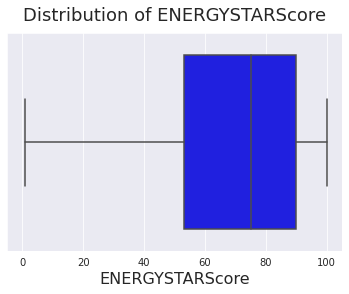

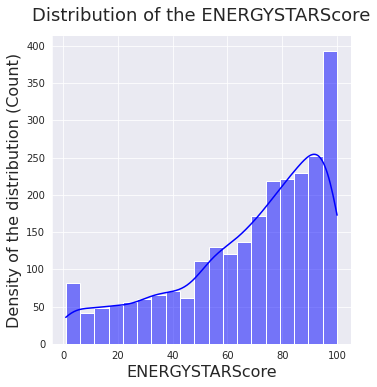

In [34]:
# Univariate Analysis (without outliers)

#Distribution using boxplot

sns.boxplot(data_out['ENERGYSTARScore'],color="blue")
plt.xlabel("ENERGYSTARScore", size=16)
plt.title("Distribution of ENERGYSTARScore", size=18, y=1.03)
plt.xlim([-5, 105])
plt.show()

#Distribution using displot

sns.displot(data_out['ENERGYSTARScore'].sort_values(ascending=True), kde=True, color="blue")
plt.title("Distribution of the ENERGYSTARScore", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("ENERGYSTARScore", size=16)
plt.show()


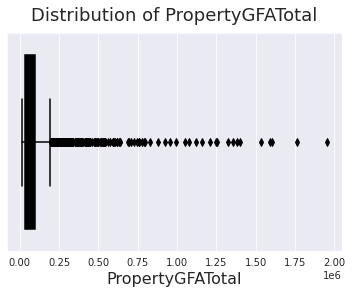

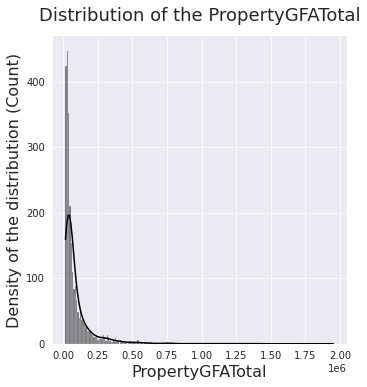

In [35]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data_out['PropertyGFATotal'],color="black")
plt.xlabel("PropertyGFATotal", size=16)
plt.title("Distribution of PropertyGFATotal", size=18, y=1.03)
plt.show()

#Distribution using displot

sns.displot(data_out['PropertyGFATotal'].sort_values(ascending=True), kde=True, color="black")
plt.title("Distribution of the PropertyGFATotal", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("PropertyGFATotal", size=16)
plt.show()

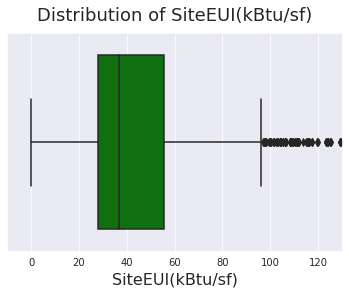

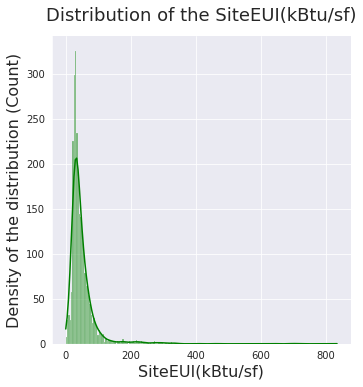

In [36]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data_out['SiteEUI(kBtu/sf)'],color="green")
plt.xlabel("SiteEUI(kBtu/sf)", size=16)
plt.title("Distribution of SiteEUI(kBtu/sf)", size=18, y=1.03)
plt.xlim([-10, 130])
plt.show()

#Distribution using displot

sns.displot(data_out['SiteEUI(kBtu/sf)'].sort_values(ascending=True), kde=True, color="green")
plt.title("Distribution of the SiteEUI(kBtu/sf)", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("SiteEUI(kBtu/sf)", size=16)
plt.show()

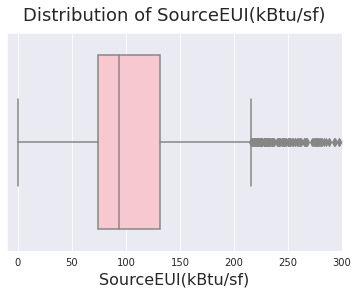

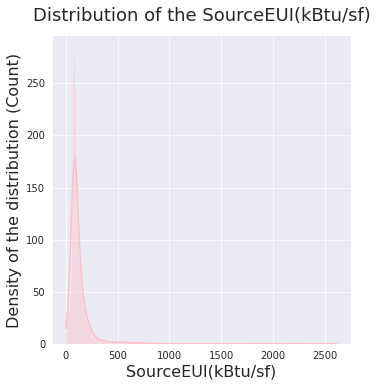

In [37]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data_out['SourceEUI(kBtu/sf)'],color="pink")
plt.xlabel("SourceEUI(kBtu/sf)", size=16)
plt.title("Distribution of SourceEUI(kBtu/sf)", size=18, y=1.03)
plt.xlim([-10, 300])
plt.show()

#Distribution using displot

sns.displot(data_out['SourceEUI(kBtu/sf)'].sort_values(ascending=True), kde=True, color="pink")
plt.title("Distribution of the SourceEUI(kBtu/sf)", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("SourceEUI(kBtu/sf)", size=16)
plt.show()

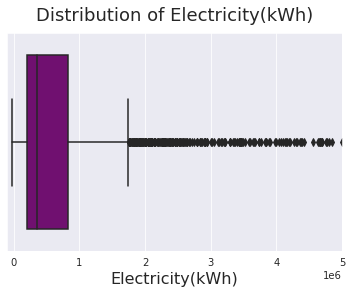

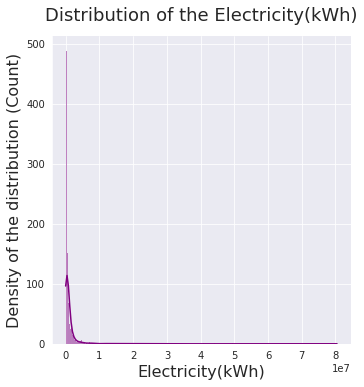

In [38]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data_out['Electricity(kWh)'],color="purple")
plt.xlabel("Electricity(kWh)", size=16)
plt.title("Distribution of Electricity(kWh)", size=18, y=1.03)
plt.xlim([-0.01e7, 0.5*1e7])
plt.show()

#Distribution using displot

sns.displot(data_out['Electricity(kWh)'].sort_values(ascending=True), kde=True, color="purple")
plt.title("Distribution of the Electricity(kWh)", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Electricity(kWh)", size=16)
plt.show()

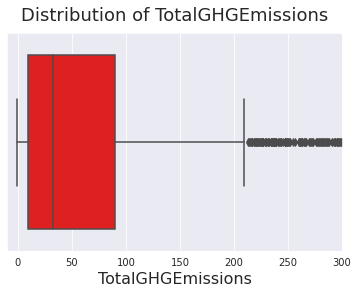

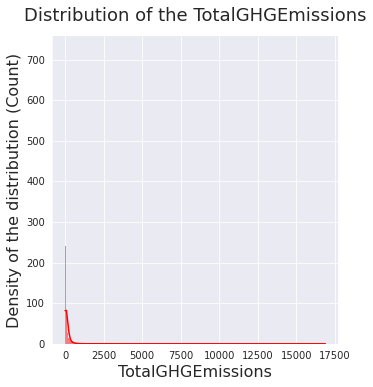

In [39]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data_out['TotalGHGEmissions'],color="red")
plt.xlabel("TotalGHGEmissions", size=16)
plt.title("Distribution of TotalGHGEmissions", size=18, y=1.03)
plt.xlim([-10, 300])
plt.show()

#Distribution using displot

sns.displot(data_out['TotalGHGEmissions'].sort_values(ascending=True), kde=True, color="red")
plt.title("Distribution of the TotalGHGEmissions", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("TotalGHGEmissions", size=16)
plt.show()

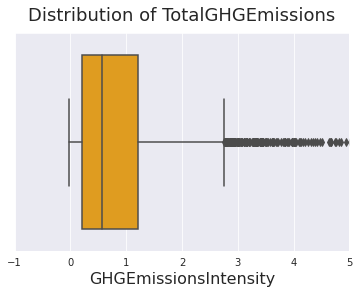

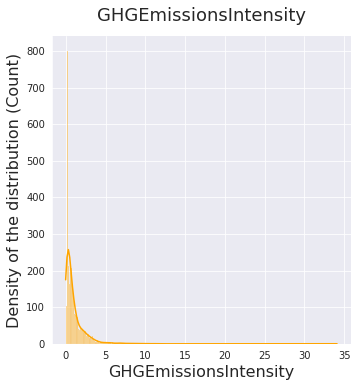

In [40]:
# Univariate Analysis 

#Distribution using boxplot

sns.boxplot(data_out['GHGEmissionsIntensity'],color="orange")
plt.xlabel("GHGEmissionsIntensity", size=16)
plt.title("Distribution of TotalGHGEmissions", size=18, y=1.03)
plt.xlim([-1, 5])
plt.show()

#Distribution using displot

sns.displot(data_out['GHGEmissionsIntensity'].sort_values(ascending=True), kde=True, color="orange")
plt.title("GHGEmissionsIntensity", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("GHGEmissionsIntensity", size=16)
plt.show()

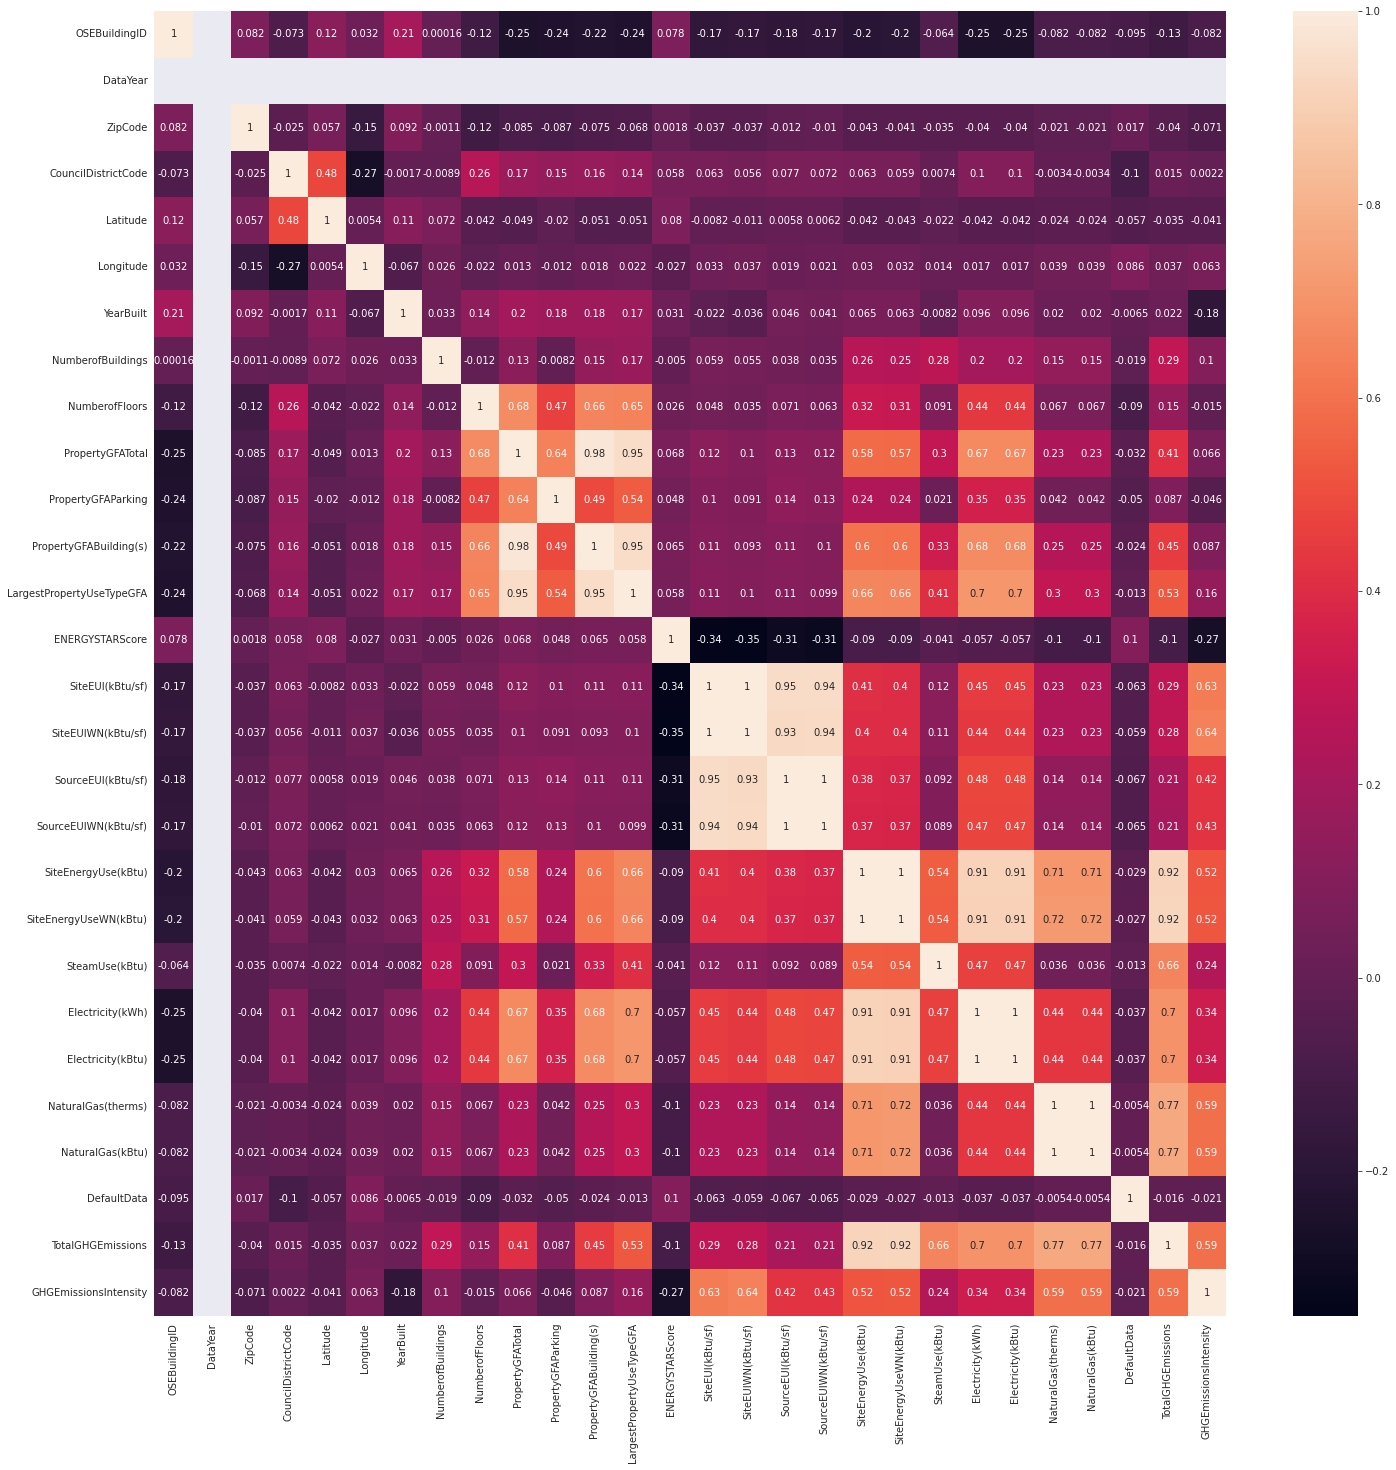

In [41]:
# correlation matrix
fig, ax = plt.subplots(figsize=(24, 24))
corrMatrix = data_out.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# ANOVA

*anova_results* table gives us the results of ANOVA between different categorical variables with ENERGYSTARScore variable.
We notice a relation of 10% with PrimaryPropertyType which is the highest.

In [42]:
X1 = "PrimaryPropertyType" # categorical 1
X2 = "BuildingType" # categorical 2
X3 = "Neighborhood" # categorical 3

Y1 = "ENERGYSTARScore" # quantitative 1 
Y2 = "GHGEmissionsIntensity" # quantitative 2
Y3 = "TotalGHGEmissions" # quantitative 3

sample_anova = data_out[data_out["ENERGYSTARScore"] < 100] # we make sure we do our analysis based on filtered data

def eta_squared(x,y):
    mean_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'mean_classe': yi_classe.mean()})
    SCT = sum([(yj-mean_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['mean_classe']-mean_y)**2 for c in classes])
    return SCE/SCT
    
x1 = eta_squared(sample_anova[X1],sample_anova[Y1]) # PrimaryPropertypeType against ENERGYSTARScore
x2 = eta_squared(sample_anova[X2],sample_anova[Y1]) # BuildingType against ENERGYSTARScore
x3 = eta_squared(sample_anova[X3],sample_anova[Y1]) # Neighborhood against ENERGYSTARScore

x4 = eta_squared(sample_anova[X1],sample_anova[Y2]) # PrimaryPropertypeType against GHGEmissionsIntensity
x5 = eta_squared(sample_anova[X2],sample_anova[Y2]) # BuildingType against GHGEmissionsIntensity
x6 = eta_squared(sample_anova[X3],sample_anova[Y2]) # Neighborhood against GHGEmissionsIntensity

x7 = eta_squared(sample_anova[X1],sample_anova[Y3]) # PrimaryPropertypeType against TotalGHGEmissions
x8 = eta_squared(sample_anova[X2],sample_anova[Y3]) # BuildingType against TotalGHGEmissions
x9 = eta_squared(sample_anova[X3],sample_anova[Y3]) # Neighborhood against TotalGHGEmissions

array1 = np.array([["PrimaryPropertyType",x1],["BuildingType",x2],["Neighborhood",x3]])
array2 = np.array([["PrimaryPropertyType",x4],["BuildingType",x5],["Neighborhood",x6]])
array3 = np.array([["PrimaryPropertyType",x7],["BuildingType",x8],["Neighborhood",x9]])

In [43]:
anova_results_energystarscore = pd.DataFrame(array1, columns =['Variable','Eta$^{2}$'])
anova_results_energystarscore.head()

,Variable,Eta$^{2}$
0,PrimaryPropertyType,0.09920059419140884
1,BuildingType,0.05511885287081045
2,Neighborhood,0.025243106885393322


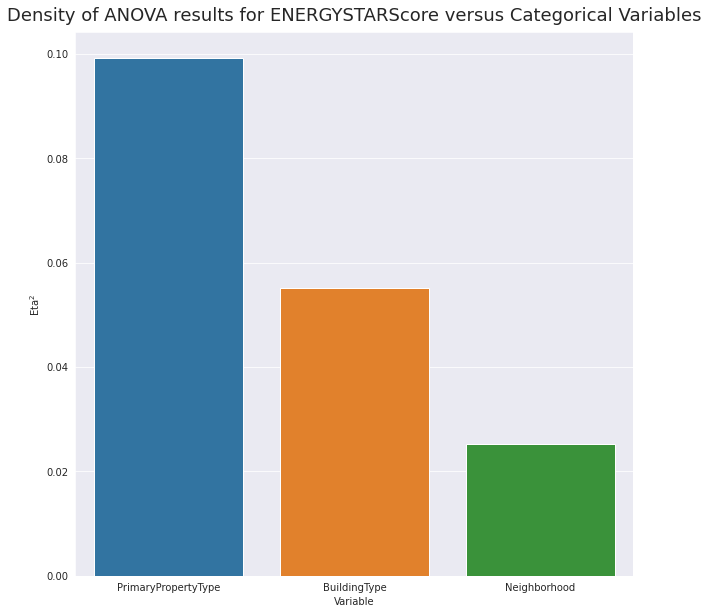

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Density of ANOVA results for ENERGYSTARScore versus Categorical Variables", size=18, y=1.01)
sns.barplot(x=anova_results_energystarscore["Variable"], y=anova_results_energystarscore["Eta$^{2}$"].astype(np.float))
plt.show()

In [45]:
anova_results_ghgemissionsintensity = pd.DataFrame(array2, columns =['Variable','Eta**2'])
anova_results_ghgemissionsintensity.head()

,Variable,Eta**2
0,PrimaryPropertyType,0.27627867818812735
1,BuildingType,0.11147872413289715
2,Neighborhood,0.017442897531532366


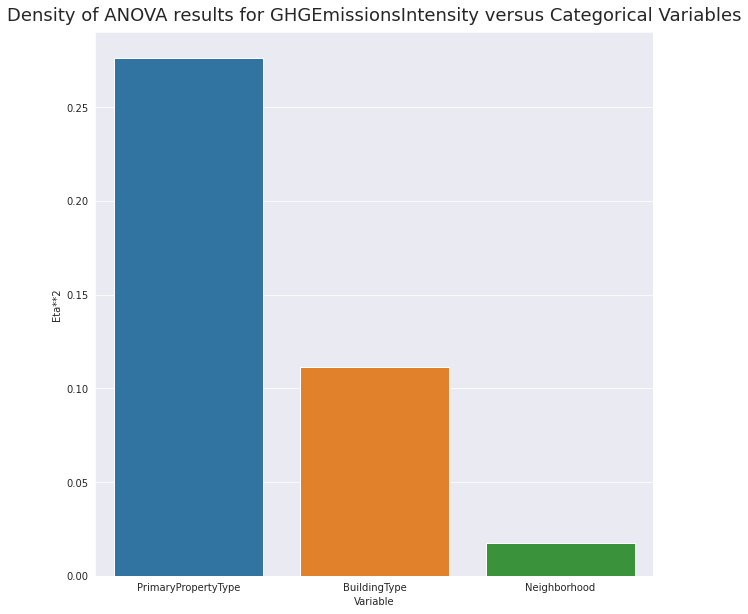

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Density of ANOVA results for GHGEmissionsIntensity versus Categorical Variables", size=18, y=1.01)
sns.barplot(x=anova_results_ghgemissionsintensity["Variable"], y=anova_results_ghgemissionsintensity["Eta**2"].astype(np.float))
plt.show()

In [47]:
anova_results_totalghgemissions = pd.DataFrame(array3, columns =['Variable','Eta**2'])
anova_results_totalghgemissions.head()

,Variable,Eta**2
0,PrimaryPropertyType,0.39253124973414744
1,BuildingType,0.09035411986523545
2,Neighborhood,0.00869506093222336


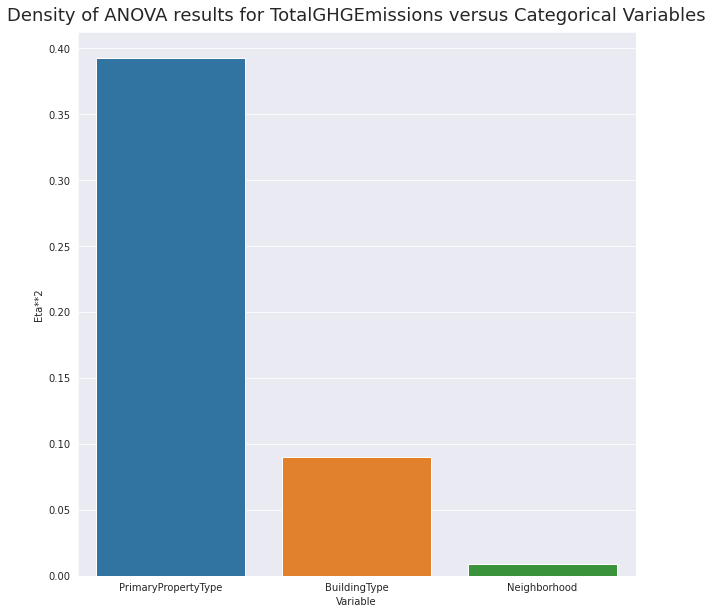

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Density of ANOVA results for TotalGHGEmissions versus Categorical Variables", size=18, y=1.01)
sns.barplot(x=anova_results_totalghgemissions["Variable"], y=anova_results_totalghgemissions["Eta**2"].astype(np.float))
plt.show()

# Preparation for Modeling

In [49]:
import os
os.chdir(r'./')
data_out.to_csv('clean_p3.csv',sep = '\t',index = True)
from IPython.display import FileLink
FileLink(r'clean_p3.csv')

/kaggle/working/clean_p3.csv